### Mission- 
    Identification of zipcodes to buy houses with pupose of maixmizing appreciation

### Dataset-
    We have a dataset which contains details about the following attributes of the houses:
        id-Id of the record
        date- date of record entry
        price- price of the house
        bedrooms- number of bedrooms
        bathrooms- number of barthrooms
        sq_feet- size of the house
        year_built-	when the house was built

### Assumptions-
    1) Age: Ideally Newer House means its in better condition (which might not always be true)
    2) Population Interest: Since we do not have demand/search_queries attempts related to each zipcode we 
         consider that each zipcode is receiving equal amount of user's traffic
    3) Location: Each Location is equally good in terms of job opportunites, Crime Rate, Schools, Malls etc.       
### Method-
#### 1) Load Data & Identify Issues
        1.1) SneakPeak
        1.2) Duplicate Entries
        1.3) Not missing but 0.0
        1.4) Missing values
     
#### 2) Renew/New Features
        2.1) Cost Feature(Low,Medium,High,Cost_Outlier)
        2.2) Square Feet (Small, Medium, Big, Size_Outlier)
        2.3) Age (Very_Old, Old, Few_Years, Recent)
        2.4) Bath to Bed Ratio (Low, Fare, Good, Very_Good)
        2.5) Bed Number (Low, Fare, Good, Very_Good)

#### 3) ZipCode Ranking
        3.1) Good Deals Counter
        3.2) Conclusion


--------------------------------

### 1) Load Data & Identify Issues
#### 1.1) SneakPeak

In [1]:
# Importing Rquired Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Fetch data from sqllite db into pandas dataframe
conn = sqlite3.connect('data.db')
cur = conn.cursor()
cur.execute('select * from home_prices')
col=['id','date','price','bedrooms','bathrooms','sq_feet','year_built','zipcode']
data = pd.DataFrame(cur.fetchall(), columns=col)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21951 entries, 0 to 21950
Data columns (total 8 columns):
id            21951 non-null int64
date          21951 non-null object
price         19644 non-null float64
bedrooms      19635 non-null float64
bathrooms     19646 non-null float64
sq_feet       19644 non-null float64
year_built    19371 non-null float64
zipcode       21951 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB
None


,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
0,12134069,2012-01-01,469995.0,3.0,NaN,1140.0,1978.0,98045
1,184970377,2012-01-03,280000.0,3.0,2.0,1290.0,1957.0,98028
2,158428665,2012-01-03,340000.0,NaN,3.0,1820.0,1918.0,98126
3,185568959,2012-01-03,425000.0,3.0,2.0,1650.0,1977.0,98052
4,142701463,2012-01-03,396000.0,3.0,2.0,970.0,1968.0,98034


##### There are total 21951 entries in dataset all of our datatypes are numeric except date. key features such as "price","bedrooms","bathrooms",'sq_feet','year_built' all have missing values which needs to be take care of!

-------
##### As per the american census average american family size is 3.14, so lets consider houses from atleast 1 bedrooms to a maximum of 6 bedrooms & avoid the outliers. 

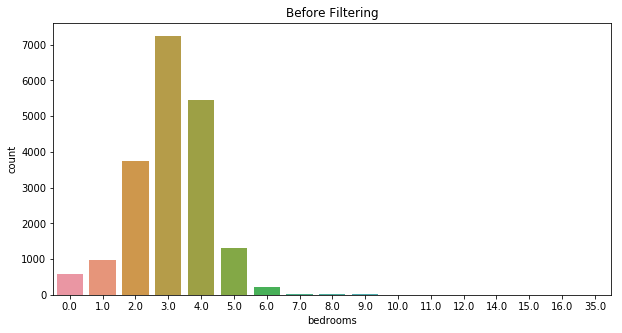

In [2]:
plt.figure(figsize=(10,5))
plt.title("Before Filtering")
sns.countplot(data['bedrooms'])
data=data[(data['bedrooms']>0)&(data['bedrooms']<7)]

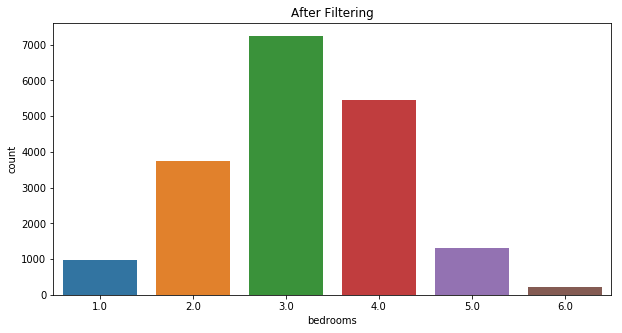

In [3]:
plt.figure(figsize=(10,5))
plt.title("After Filtering")
sns.countplot(data['bedrooms'])

#### 1.2) Duplicate Entries

In [4]:
## Duplication data
print("Number of duplicate Records!",len(data[data.duplicated(['id'])]))
print("Example of duplicate Records:")
dups=data[(data['id']==20660122) | (data['id']==185577037)| (data['id']==142085818) |(data['id']==217060706)]
dups.sort_values(by='id')

('Number of duplicate Records!', 283)
Example of duplicate Records:


,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
1415,20660122,2012-06-29,219950.0,2.0,2.0,1230.0,1945.0,98014
2947,20660122,2012-12-18,NaN,2.0,2.0,1230.0,1945.0,98014
3761,142085818,2013-04-02,300000.0,4.0,3.0,1170.0,1969.0,98031
4578,142085818,2013-06-13,NaN,4.0,3.0,1170.0,1969.0,98031
712,185577037,2012-04-16,369000.0,3.0,2.0,870.0,1950.0,98126
1233,185577037,2012-06-13,369000.0,3.0,2.0,870.0,1950.0,98126
2770,217060706,2012-12-03,449950.0,4.0,3.0,1986.0,2012.0,98092
21474,217060706,2017-11-07,NaN,4.0,3.0,1986.0,2012.0,98092


##### Drop the duplicates & keep the 1st occurances only because from my analysis i undestood that either both entries are exact same or the second entry contains the null for price & rest all feature are same. SO LETS KEEP ONLY THE FIRST ENTRY!

In [5]:
data=data.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)
print("Number of duplicate Records!",len(data[data.duplicated(['id'])]))
data.head()

('Number of duplicate Records!', 0)


,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
0,12134069,2012-01-01,469995.0,3.0,NaN,1140.0,1978.0,98045
1,184970377,2012-01-03,280000.0,3.0,2.0,1290.0,1957.0,98028
2,185568959,2012-01-03,425000.0,3.0,2.0,1650.0,1977.0,98052
3,142701463,2012-01-03,396000.0,3.0,2.0,970.0,1968.0,98034
4,53640425,2012-01-03,NaN,4.0,4.0,2720.0,NaN,98115


#### 1.3) Not missing but 0 !

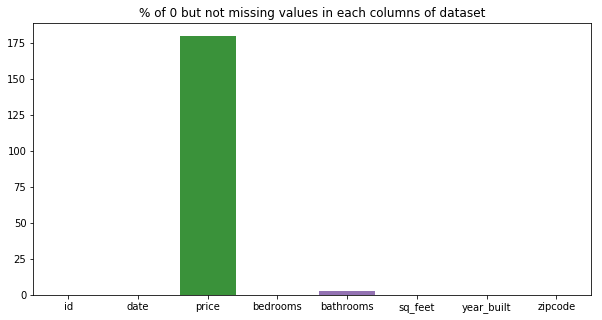

In [6]:
#Missing values
plt.figure(figsize=(10,5))
x=col
p=len(data)
y=[]
for i in data.columns:
    y.append(len(data[data[i]==0]))
plt.title('% of 0 but not missing values in each columns of dataset')
sns.barplot(x,y)

Let's handle this issue one-by-one for each feature:

##### Lets look at houses with 0 bathrooms 

In [7]:
data[data['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
315,185465631,2012-02-28,NaN,1.0,0.0,560.0,1940.0,98065
2909,185710512,2013-02-20,NaN,2.0,0.0,945.0,2000.0,98058
10780,35368994,2015-08-12,296000.0,2.0,0.0,NaN,1992.0,98122


In [8]:
#Lets fill this values by figuring out the average number of bathrooms in a 2 & 1 bedroom apartment
print('average number of bathrooms in 2 bedrooms house',data['bathrooms'][data['bedrooms']==2].mean())
print('average number of bathrooms in 2 bedrooms house',data['bathrooms'][data['bedrooms']==1].mean())
data['bathrooms'][data['id']==185465631]=1
data['bathrooms'][data['id']==185710512]=2
data['bathrooms'][data['id']==35368994]=2

('average number of bathrooms in 2 bedrooms house', 1.8061713600958658)
('average number of bathrooms in 2 bedrooms house', 1.1088757396449704)


##### Lets look at houses with 0 price!

In [9]:
data[data['price']==0].head()

,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
44,149166796,2012-01-09,0.0,3.0,2.0,1070.0,1961.0,98006
61,152219878,2012-01-11,0.0,3.0,1.0,NaN,1955.0,98168
79,144008964,2012-01-17,0.0,4.0,3.0,1640.0,1973.0,98178
81,4432194,2012-01-17,0.0,4.0,3.0,1860.0,1992.0,98038
112,100127978,2012-01-25,0.0,3.0,NaN,1210.0,NaN,98108


#### We can predict the approximate house proce using any ML Regression algorithm & key features would be "sq_feet","year_built",'zipcode','bedrooms' but for simplicity in this excercise we will just fill the values using average values (for example average price of a 100 sq feet -3bhk house in zipcode 98006)

In [10]:
# This is just a simple way to fill the misssing values , in real scenario we will use more features with better algorhtim.
for i in data[data['price']==0].index:
    bed_no=data.loc[i]['bedrooms']
    zip_code=data.loc[i]['zipcode']
    pred_price=data['price'][(data['zipcode']==zip_code) & (data['bedrooms']==bed_no)].mean()
    #data.loc[i]['price']=pred_price
    data.set_value(i, 'price', pred_price)
data[data['price']==0].head()

,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
355,151138861,2012-03-07,0.0,6.0,4.0,NaN,1947.0,98039


#### There is no easier & quick way to find the price of this house because its the only 6 badroom house in zip code 98039 , so lets just skip it for now :( . but in real scenario we would trained & ML algorithm which could do the job .

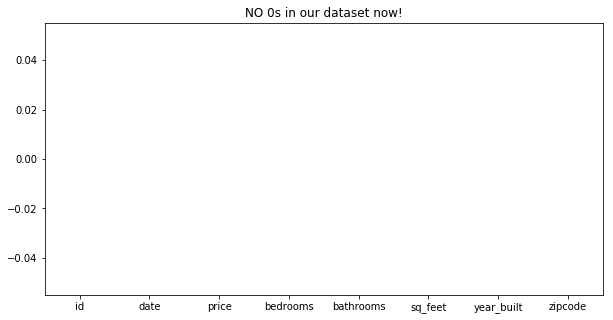

In [11]:
data=data[data['id']<>151138861]
#Missing values
plt.figure(figsize=(10,5))
x=col
p=len(data)
y=[]
for i in data.columns:
    y.append(len(data[data[i]==0]))
plt.title('NO 0s in our dataset now!')
sns.barplot(x,y)

#### 1.4) Missing values

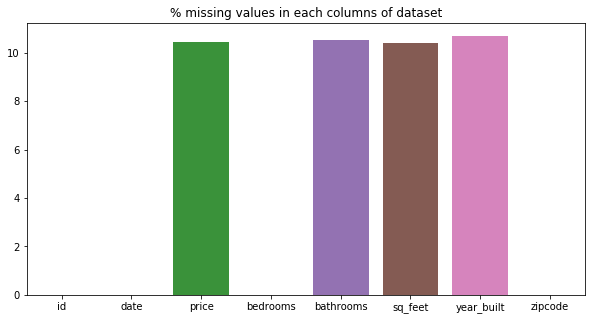

In [12]:
#Missing values
plt.figure(figsize=(10,5))
x=col
p=len(data)
y=[]
for i in data.columns:
    y.append(len(data[data[i].isnull()])*100.0/p)
plt.title('% missing values in each columns of dataset')
sns.barplot(x,y)

##### Calculating approx. value for missing price fields by using the zip_code & bedrooms as feature

In [13]:
for i in data[data['price'].isnull()].index:
    bed_no=data.loc[i]['bedrooms']
    zip_code=data.loc[i]['zipcode']
    pred_price=data['price'][(data['zipcode']==zip_code) & (data['bedrooms']==bed_no)].mean()
    #data.loc[i]['price']=pred_price
    data.set_value(i, 'price', pred_price)
    
# only one house with nan price left just ignore it for simply city
data=data[data['id']<>185465170]
data.head()

,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode
0,12134069,2012-01-01,469995.000000,3.0,NaN,1140.0,1978.0,98045
1,184970377,2012-01-03,280000.000000,3.0,2.0,1290.0,1957.0,98028
2,185568959,2012-01-03,425000.000000,3.0,2.0,1650.0,1977.0,98052
3,142701463,2012-01-03,396000.000000,3.0,2.0,970.0,1968.0,98034
4,53640425,2012-01-03,833321.704545,4.0,4.0,2720.0,NaN,98115


##### Calculating approx. value for missing barthrooms field by using the zip_code & bedrooms as feature

In [14]:
for i in data[data['bathrooms'].isnull()].index:
    bed_no=data.loc[i]['bedrooms']
    zip_code=data.loc[i]['zipcode']
    pred_price=round(data['bathrooms'][(data['zipcode']==zip_code) & (data['bedrooms']==bed_no)].mean())
    data.set_value(i, 'bathrooms', pred_price)

##### Calculating approx. value for missing sq_feets field by using the zip_code & bedrooms & barthrooms as feature

In [15]:
import math
for i in data[data['sq_feet'].isnull()].index:
    bed_no=data.loc[i]['bedrooms']
    zip_code=data.loc[i]['zipcode']
    bath_no=data.loc[i]['bathrooms']
    pred_price=data['sq_feet'][(data['zipcode']==zip_code) & (data['bedrooms']==bed_no) & (data['bathrooms']==bath_no)].mean()
    if math.isnan(pred_price):
        pred_price=data['sq_feet'][(data['zipcode']==zip_code) & (data['bedrooms']==bed_no) ].mean()
    data.set_value(i, 'sq_feet', pred_price)
data=data[data['id']<>141897859]    

##### Missing values now

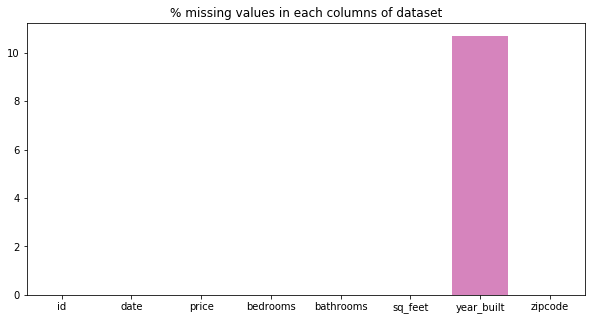

In [16]:
plt.figure(figsize=(10,5))
x=col
p=len(data)
y=[]
for i in data.columns:
    y.append(len(data[data[i].isnull()])*100.0/p)
plt.title('% missing values in each columns of dataset')
sns.barplot(x,y)

### Filling year_built missing values is not possible here because currently i don't see any feature that could help us to predict the age of missing houses.

### 2) Renew/New Features
#### 2.1) Cost Category(Low,Medium,High,Cost_Outlier)
How is the cost of the house as compared to the all other houses in the dataset.

In [17]:
import numpy as np
Q25,Q50, Q75 = np.percentile(data['price'], [25,50,75])
cc=[]
ncc=[]
for i in data['price']:
    if i<=Q25:
        cc.append('Low')
        ncc.append('1')
    if i>Q25 and i<=Q50:
        cc.append('Medium')
        ncc.append('2')
    if i>Q50 and i<=Q75:
        cc.append('High')
        ncc.append('3')
    if i>Q75 :
        cc.append('Cost_Outlier')
        ncc.append('4')
data['Cost_Category']=cc
data['nCost']=ncc

#### 2.2) Size Category (Small, Medium, Big, Size_Outlier)
How is the size of the house as compared to the all other houses in the dataset.

In [18]:
import numpy as np
Q25,Q50, Q75 = np.percentile(data['sq_feet'], [25,50,75])
cc=[]
ncc=[]
for i in data['sq_feet']:
    if i<=Q25:
        cc.append('Small')
        ncc.append('1')
    if i>Q25 and i<=Q50:
        cc.append('Medium')
        ncc.append('2')
    if i>Q50 and i<=Q75:
        cc.append('Big')
        ncc.append('3')
    if i>Q75 :
        cc.append('Size_Outlier')
        ncc.append('4')
data['Size_Category']=cc
data['nSc']=ncc

#### 2.3) Age (Very_Old, Old, Few_Years, Recent)
How is the Age of the house as compared to the all other houses in the dataset.

In [19]:
import numpy as np
Q25,Q50, Q75 = np.percentile(data['year_built'][data['year_built'].notnull()], [25,50,75])
data=data.fillna(0)
cc=[]
ncc=[]
for i in data['year_built']:
    if i>0 and i<=Q25:
        cc.append('Very_Old')
        ncc.append('1')
    if i>Q25 and i<=Q50:
        cc.append('Old')
        ncc.append('2')
    if i>Q50 and i<=Q75:
        cc.append('Few_Years')
        ncc.append('3')
    if i>Q75 :
        cc.append('Recent')
        ncc.append('4')
    if i==0:
        cc.append('unkown')
        ncc.append('0')
data['Age']=cc
data['nAge']=ncc

#### 2.4) Bath Bed Ratio
How is the Barthroom to Bedroom ration for the house as compared to the all other houses in the dataset.

In [20]:
k=data['bathrooms']*100.0/data['bedrooms']
Q25,Q50, Q75 = np.percentile(k, [25,50,75])
cc=[]
ncc=[]
for i in k:
    if i>0 and i<Q25:
        cc.append('Low')
        ncc.append('1')
    if i>=Q25 and i<Q50:
        cc.append('Fare')
        ncc.append('2')
    if i>=Q50 and i<Q75:
        cc.append('Good')
        ncc.append('3')
    if i>=Q75 :
        cc.append('Very_Good')
        ncc.append('4')
data['bb_ratio']=cc
data['nbb']=ncc

##### How data looks now!

In [21]:
data.head(7)

,id,date,price,bedrooms,bathrooms,sq_feet,year_built,zipcode,Cost_Category,nCost,Size_Category,nSc,Age,nAge,bb_ratio,nbb
0,12134069,2012-01-01,469995.000000,3.0,2.0,1140.0,1978.0,98045,High,3,Medium,2,Old,2,Fare,2
1,184970377,2012-01-03,280000.000000,3.0,2.0,1290.0,1957.0,98028,Low,1,Medium,2,Very_Old,1,Fare,2
2,185568959,2012-01-03,425000.000000,3.0,2.0,1650.0,1977.0,98052,Medium,2,Big,3,Old,2,Fare,2
3,142701463,2012-01-03,396000.000000,3.0,2.0,970.0,1968.0,98034,Medium,2,Small,1,Old,2,Fare,2
4,53640425,2012-01-03,833321.704545,4.0,4.0,2720.0,0.0,98115,Cost_Outlier,4,Size_Outlier,4,unkown,0,Very_Good,4
5,33756215,2012-01-03,558960.335515,1.0,1.0,711.0,2006.0,98102,High,3,Small,1,Recent,4,Very_Good,4
6,54054990,2012-01-03,215000.000000,4.0,3.0,1440.0,1985.0,98168,Low,1,Medium,2,Few_Years,3,Good,3


In [22]:
print('Unique Bedrooms',data['bedrooms'].unique())
print('Unique Barthrooms',data['bathrooms'].unique())

('Unique Bedrooms', array([ 3.,  4.,  1.,  2.,  5.,  6.]))
('Unique Barthrooms', array([  2.,   4.,   1.,   3.,   5.,   6.,   7.,   8.,  27.]))


In [23]:
print('get rid of 1 outlier id:',data['id'][data['bathrooms']==27])
data=data[data['id']<>151699838]

('get rid of 1 outlier id:', 15611    151699838
Name: id, dtype: int64)


#### 2.5) Bed Number
Qualitative Evaluation Bedroom numbers keeping single family in minde.

In [24]:
cc=[]
ncc=[]
for b in data['bedrooms']:
    if b==1:
        cc.append('low')
        ncc.append('1')
    if b==2 or b==3:
        cc.append('Fare')
        ncc.append('2')
        
    if b==4 or b==5:
        cc.append('Good')
        ncc.append('3')
    
    if b>5:
        cc.append('High')
        ncc.append('4')
        
data['Bed_cat']=cc
data['nBed']=ncc

### 3) ZipCode Evaluation- 
#### 3.1) Good Deals Counter

In [27]:
zip_codes=pd.DataFrame(columns=['zipcode'])
zip_codes['zipcode']=data['zipcode'].unique()
lb=[]
for zc in zip_codes['zipcode']:
    lb.append(len(data[(data['zipcode']==zc)&(data['nCost']<=data['nSc']) & (data['nCost']<=data['nAge']) & (data['nCost']<=data['nbb'])&(data['nCost']<=data['nBed'])]))
zip_codes['Good_Deal_Count']=lb   
zip_codes=zip_codes.sort_values(by='Good_Deal_Count',ascending=False).reset_index()
del zip_codes['index']
print('Below is the list of our top 10 recommandations')
zip_codes.head(10)

Below is the list of our top 10 recommandations


,zipcode,Good_Deal_Count
0,98042,408
1,98092,372
2,98038,311
3,98023,283
4,98058,253
5,98001,231
6,98034,224
7,98030,215
8,98031,213
9,98056,211


#### 3.2) Conclusion
Above table shows the zipcodes along with number of good deals avaialble(less price more gain). This results are prouced after making the best utilization of available features in given time limit. In real scenario based on the availablity of more meaningfull features the complete analysis method & results can be very different from above!